# $$\color{red}{\text{Machine Learning}}$$

$$\color{orange}{\text{Multi Layer Neural Network}}$$

$$\color{lime}{\text{Alireza Javid - 810198375}}$$

## $\color{deepskyblue}{\text{Import Libraries}}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## $\color{deepskyblue}{\text{Preprocessing}}$

In [3]:
df = pd.read_csv("ECG.csv")
df.head()

,Unnamed: 0,label,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat160,feat161,feat162,feat163,feat164,feat165,feat166,feat167,feat168,feat169
0,0,O,5,661.190476,658.333333,55.278736,106.962730,111.113889,13,0.928571,...,0.165551,0.196,0.321645,0.074160,0.000000,0.000000,0.000000,0.019540,0.340,0.000
1,1,O,5,661.666667,658.333333,56.579873,108.407273,112.510209,13,0.928571,...,0.190431,0.196,0.362420,0.085271,0.000000,0.000000,0.000000,0.022238,0.332,0.000
2,2,O,8,661.904762,660.000000,58.758004,112.796617,117.091412,13,0.928571,...,0.094497,0.316,0.376645,0.042448,0.000000,0.000000,0.000000,0.023166,0.452,0.000
3,3,O,7,660.952381,663.333333,59.029597,113.649634,117.981601,13,0.928571,...,0.157149,0.284,0.419043,0.070674,0.026236,0.015264,0.594278,0.025686,0.256,0.128
4,4,O,5,660.476191,663.333333,55.759820,107.623910,111.732026,13,0.928571,...,0.162662,0.204,0.354123,0.072988,0.025833,0.014326,0.657085,0.021802,0.328,0.128


In [4]:
df.isnull().any().value_counts()

False    171
dtype: int64

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df["label"].value_counts()

N    5992
O    3151
A     923
~     187
Name: label, dtype: int64

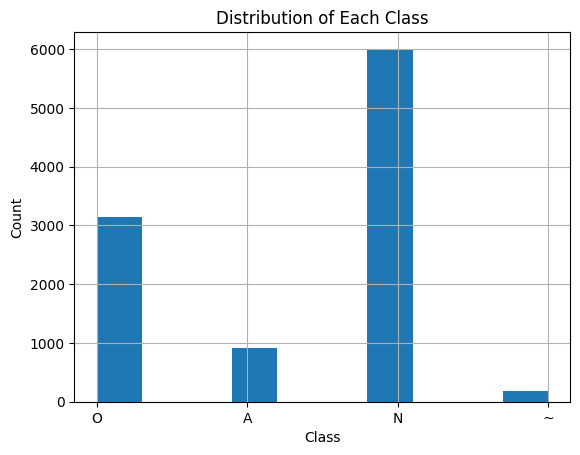

In [6]:
df["label"].hist()
plt.title("Distribution of Each Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [7]:
num_classes = 4
le = LabelEncoder()
y = le.fit_transform(df["label"])
X = df.drop("label", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## $\color{deepskyblue}{\text{Network Model}}$
we used a 4 layers network for classification.

In [8]:
model = keras.models.Sequential([
    keras.layers.Dense(338, activation="relu", input_shape=(169,)),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(4, activation="softmax")
])

In [9]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 338)               57460     
                                                                 
 dense_1 (Dense)             (None, 150)               50850     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                                 
 dense_3 (Dense)             (None, 4)                 304       
                                                                 
Total params: 119,939
Trainable params: 119,939
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
246/246 [==============================] - 3s 7ms/step - loss: 112.5147 - accuracy: 0.5647 - val_loss: 106.3302 - val_accuracy: 0.6462
Epoch 2/50
246/246 [==============================] - 2s 8ms/step - loss: 43.2821 - accuracy: 0.6067 - val_loss: 14.3401 - val_accuracy: 0.6231
Epoch 3/50
246/246 [==============================] - 2s 8ms/step - loss: 162.3560 - accuracy: 0.5865 - val_loss: 19.0106 - val_accuracy: 0.6383
Epoch 4/50
246/246 [==============================] - 3s 10ms/step - loss: 96.5337 - accuracy: 0.6136 - val_loss: 313.7549 - val_accuracy: 0.4794
Epoch 5/50
246/246 [==============================] - 2s 9ms/step - loss: 115.2736 - accuracy: 0.6305 - val_loss: 66.2855 - val_accuracy: 0.6505
Epoch 6/50
246/246 [==============================] - 3s 11ms/step - loss: 182.5924 - accuracy: 0.5840 - val_loss: 30.6545 - val_accuracy: 0.5964
Epoch 7/50
246/246 [==============================] - 2s 8ms/step - loss: 16.7331 - accuracy: 0.6370 - val_loss: 38.7639 - val_a

In [11]:
model.evaluate(X_test, y_test, verbose=0)

[25.794219970703125, 0.6978557705879211]

In [37]:
def chose_class(y):
  labels = ['O', 'A', 'N', '~']
  y_pred_label = [0]*y.shape[0]
  for row_i in range(y.shape[0]):
    i = np.argmax(y[row_i])
    y_pred_label[row_i] = labels[i]
  return y_pred_label


In [45]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_label = chose_class(y_pred)
y_test_label = chose_class(y_test)
report = classification_report(y_test_label, y_pred_label, target_names=df.label.unique())
print("Classification Report:")
print(report)

33/33 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           O       0.82      0.79      0.80       590
           A       0.55      0.70      0.62       321
           N       0.52      0.29      0.37        98
           ~       0.00      0.00      0.00        17

    accuracy                           0.70      1026
   macro avg       0.47      0.44      0.45      1026
weighted avg       0.69      0.70      0.69      1026



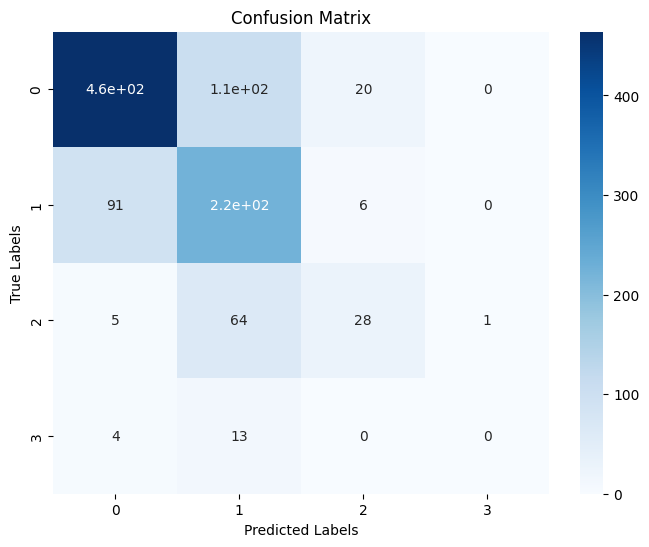

In [48]:
cm = confusion_matrix(y_test_label, y_pred_label)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## $\color{deepskyblue}{\text{Normalization}}$
In this part we normalize our data and start training with the previous network.

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [53]:
model2 = keras.models.Sequential([
    keras.layers.Dense(338, activation="relu", input_shape=(169,)),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(4, activation="softmax")
])
model2.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [54]:
history2 = model2.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
246/246 [==============================] - 3s 9ms/step - loss: 0.7435 - accuracy: 0.7191 - val_loss: 0.5705 - val_accuracy: 0.7646
Epoch 2/50
246/246 [==============================] - 1s 6ms/step - loss: 0.5212 - accuracy: 0.7948 - val_loss: 0.5129 - val_accuracy: 0.7986
Epoch 3/50
246/246 [==============================] - 1s 5ms/step - loss: 0.4702 - accuracy: 0.8168 - val_loss: 0.4851 - val_accuracy: 0.8116
Epoch 4/50
246/246 [==============================] - 1s 5ms/step - loss: 0.4339 - accuracy: 0.8313 - val_loss: 0.4705 - val_accuracy: 0.8130
Epoch 5/50
246/246 [==============================] - 1s 5ms/step - loss: 0.4072 - accuracy: 0.8438 - val_loss: 0.4590 - val_accuracy: 0.8260
Epoch 6/50
246/246 [==============================] - 1s 5ms/step - loss: 0.3817 - accuracy: 0.8546 - val_loss: 0.4551 - val_accuracy: 0.8195
Epoch 7/50
246/246 [==============================] - 1s 4ms/step - loss: 0.3595 - accuracy: 0.8651 - val_loss: 0.4374 - val_accuracy: 0.8339
Epoch 

In [55]:
model2.evaluate(x_test, y_test, verbose=0)

[0.8309987783432007, 0.8547758460044861]

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model2.predict(x_test)
y_pred_label = chose_class(y_pred)
y_test_label = chose_class(y_test)
report = classification_report(y_test_label, y_pred_label, target_names=df.label.unique())
print("Classification Report:")
print(report)

33/33 [==============================] - 1s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           O       0.89      0.91      0.90       590
           A       0.81      0.79      0.80       321
           N       0.88      0.85      0.86        98
           ~       0.44      0.41      0.42        17

    accuracy                           0.85      1026
   macro avg       0.75      0.74      0.75      1026
weighted avg       0.85      0.85      0.85      1026



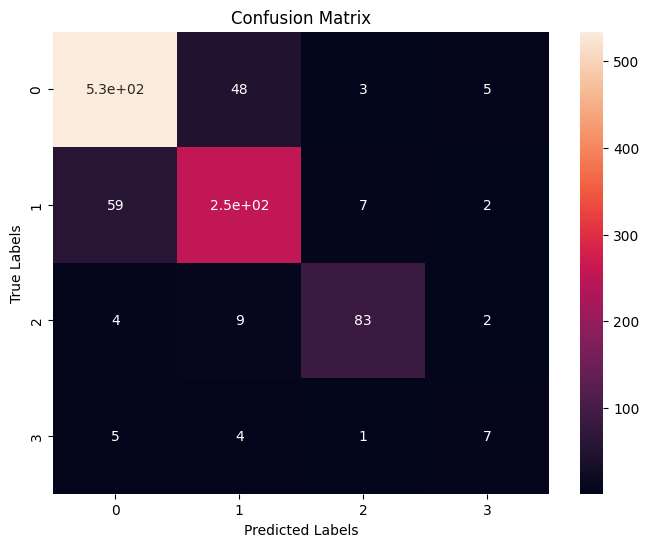

In [59]:
cm = confusion_matrix(y_test_label, y_pred_label)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## $\color{deepskyblue}{\text{Preprocessing 2}}$
Now, we omit 2 classes with less population to increase accuracy.

In [60]:
def change_dataset(x):
  if x["label"] == "A" or x["label"] == "O":
    return "AN"
  else:
    return x["label"]

In [61]:
df2 = pd.read_csv("ECG.csv")

In [62]:
df2["label"] = df2.apply(change_dataset, axis=1)
df2.drop("Unnamed: 0", axis=1, inplace=True)
df2 = df2[df2["label"] != '~']
df2["label"].value_counts()

N     5992
AN    4074
Name: label, dtype: int64

In [63]:
num_classes = 2
le = LabelEncoder()
y = le.fit_transform(df2["label"])
X = df2.drop("label", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [65]:
model3 = keras.models.Sequential([
    keras.layers.Dense(338, activation="relu", input_shape=(169,)),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])
model3.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [66]:
history3 = model3.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
241/241 [==============================] - 3s 8ms/step - loss: 0.4619 - accuracy: 0.7970 - val_loss: 0.4222 - val_accuracy: 0.8227
Epoch 2/50
241/241 [==============================] - 1s 5ms/step - loss: 0.3694 - accuracy: 0.8452 - val_loss: 0.3907 - val_accuracy: 0.8352
Epoch 3/50
241/241 [==============================] - 1s 5ms/step - loss: 0.3343 - accuracy: 0.8616 - val_loss: 0.3768 - val_accuracy: 0.8440
Epoch 4/50
241/241 [==============================] - 1s 5ms/step - loss: 0.3086 - accuracy: 0.8725 - val_loss: 0.3615 - val_accuracy: 0.8484
Epoch 5/50
241/241 [==============================] - 3s 11ms/step - loss: 0.2883 - accuracy: 0.8834 - val_loss: 0.3523 - val_accuracy: 0.8587
Epoch 6/50
241/241 [==============================] - 3s 10ms/step - loss: 0.2687 - accuracy: 0.8969 - val_loss: 0.3442 - val_accuracy: 0.8565
Epoch 7/50
241/241 [==============================] - 3s 12ms/step - loss: 0.2514 - accuracy: 0.9027 - val_loss: 0.3355 - val_accuracy: 0.8609
Epo

In [67]:
model3.evaluate(x_test, y_test, verbose=0)

[0.5573200583457947, 0.889771580696106]

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model3.predict(x_test)
y_pred_label = chose_class(y_pred)
y_test_label = chose_class(y_test)
report = classification_report(y_test_label, y_pred_label, target_names=df2.label.unique())
print("Classification Report:")
print(report)

32/32 [==============================] - 0s 7ms/step
Classification Report:
              precision    recall  f1-score   support

          AN       0.90      0.91      0.91       608
           N       0.87      0.85      0.86       399

    accuracy                           0.89      1007
   macro avg       0.89      0.88      0.88      1007
weighted avg       0.89      0.89      0.89      1007



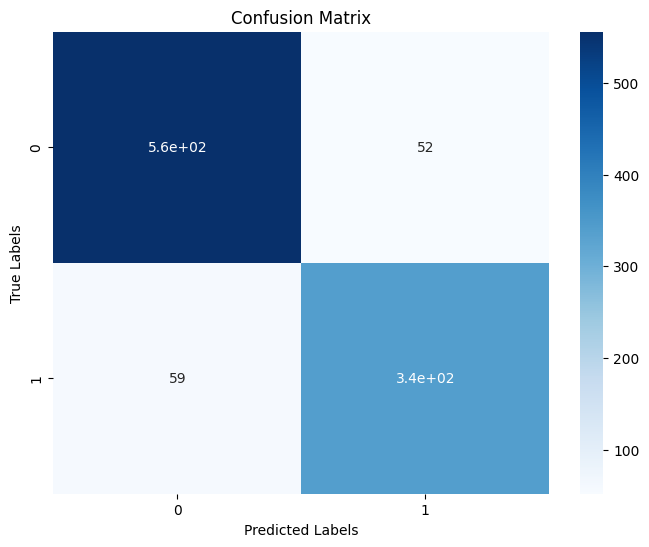

In [70]:
cm = confusion_matrix(y_test_label, y_pred_label)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()